# Laboratório

## Planejamento

- Ler o data set (https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tasks/main/data/task_sample.csv)
- Criar as perguntas
- Eleborar ánalises com base nas perguntas
- Criar os testes
- Expor valores obtidos

## Questões

- Q1: Qual a label é comumente mais acionada?
- Q2: Qual o tamanho médio do _body_ para a _label Bug_?
- Q3: Qual as 30 palavras que mais aparecem no _body_ para a _label Bug_?
- Q4: Qual o tamanho médio do título para a _label Bug_?
- Q5: Qual as 30 palavras que mais aparecem no título para a _label Bug_?

# Área de imports

In [1]:
! pip install texthero 

In [2]:
import pandas as pd
import seaborn as sns
import texthero as hero
import matplotlib.pyplot as plt

# Carregamento dos dados

In [23]:
rawData = 'https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tasks/main/data/task_sample.csv'
df = pd.read_csv(rawData, sep='|', names=["title", "body", "label"])

In [24]:
df['raw-label'] = df['label']
df['label'] = df['label'].apply(lambda x: 'Bug' if x == 'Bug' else 'NonBug')

In [25]:
df

title  ... raw-label
0                         unions should build as selects  ...   Feature
1      does all component supports mobility design re...  ...  Question
2      checkboxes have wrong values on completed star...  ...       Bug
3                               ruby memory leak in grpc  ...       Bug
4                          graphics load times seem long  ...   Feature
...                                                  ...  ...       ...
14995         alex' oki move select shows unuseful moves  ...       Bug
14996          movement speed calculations need updating  ...       Bug
14997   fcntl can fail -> not checked in net_would_block  ...       Bug
14998  animation: color tags should be able to have d...  ...   Feature
14999      bug in tab should be the same bug on the page  ...   Feature

[15000 rows x 4 columns]

# Análise exploratória dos dados

### Métodos de apoio

In [26]:
def text_cleansing(df: pd.DataFrame, column_name: str):
    custom_pipeline = [hero.preprocessing.lowercase,
                       hero.preprocessing.remove_digits,
                       hero.preprocessing.remove_punctuation,
                       hero.remove_stopwords,
                       hero.remove_whitespace]

    return hero.clean(df[column_name], custom_pipeline)

In [27]:
def collect_n_most_frequent_words(df: pd.DataFrame, column: str, n: int):
    if n < 0: return {}
    result = pd.Series(' '.join(df[column]).lower().split()).value_counts()[:n].to_dict()
    return sorted(result.items(), key=lambda item: -item[1])

### Q1: Qual a label é comumente mais acionada?

#### Resposta:

*A label mais utilizada é a Feature logo em seguida a label Bug*

In [28]:
df['raw-label'].value_counts()

Feature     6844
Bug         6746
Question    1410
Name: raw-label, dtype: int64

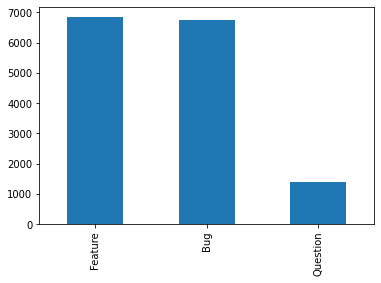

In [29]:
df['raw-label'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

### Q2: Qual o tamanho médio do _body_ para cada _label_?

#### Resposta:

| Label     | Tamanho médio         |
| --------- | --------------------- |
| Bug:      | 516.576045 caractéres |
| Non-Bug:  | 353.918827 caractéres |

In [30]:
df['body-size'] = df['body'].apply(lambda x: len(x))

plotBaseQ2 = df.groupby('label')['body-size'].mean().sort_values(ascending=False)

plotBaseQ2

label
Bug       516.576045
NonBug    353.918827
Name: body-size, dtype: float64

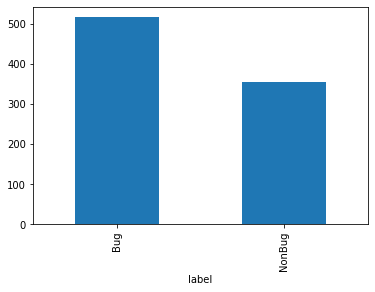

In [31]:
plotBaseQ2.plot(kind = 'bar')

### Q3: Qual a palavra que mais aparece no _body_ para cada _label_?

#### Resposta:

| Label   | Top 1 | Top 2 | Top3 |
| ------- | ----- | ----- | ---- |
| Bug:    | file  | error | java |
| NonBug: | would | use   | add  |

In [51]:
df['clean-body'] = text_cleansing(df, 'body')

bug_df = df[df['label'] == 'Bug']
non_bug_df = df[df['label'] == 'NonBug']

top_bug = collect_n_most_frequent_words(bug_df, 'clean-body', 3)
top_non_bug = collect_n_most_frequent_words(non_bug_df, 'clean-body', 3)

In [52]:
top_bug

[('file', 2762), ('error', 2700), ('java', 2348)]

In [53]:
top_non_bug

[('would', 2450), ('use', 1492), ('add', 1482)]

### Q4: Qual o tamanho médio do _título_ para cada _label_?

#### Resposta:

| Label   | Tamanho médio        |
| ------- | -------------------- |
| Bug:    | 48.339164 caractéres |
| NonBug: | 41.260480 caractéres |

In [36]:
df['title-size'] = df['title'].apply(lambda x: len(x))

plotBaseQ4 = df.groupby('label')['title-size'].mean().sort_values(ascending=False)

plotBaseQ4

label
Bug       48.339164
NonBug    41.260480
Name: title-size, dtype: float64

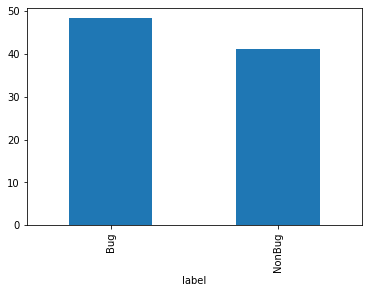

In [37]:
plotBaseQ4.plot(kind = 'bar')

### Q5: 

#### Resposta:

| Label   | Top 1 | Top 2   | Top3 |
| ------- | ------| ------- | ---- |
| Bug:    | error | cannot  | bug  |
| NonBug: | add   | support | use  |

In [48]:
df['clean-title'] = text_cleansing(df, 'title')

bug_df = df[df['label'] == 'Bug']
non_bug_df = df[df['label'] == 'NonBug']

top_bug = collect_n_most_frequent_words(bug_df, 'clean-title', 3)
top_non_bug = collect_n_most_frequent_words(nonBug_df, 'clean-title', 3)

In [49]:
top_bug

[('error', 408), ('cannot', 223), ('bug', 203)]

In [50]:
top_non_bug

[('add', 1111), ('support', 444), ('use', 250)]

# Testes unitários

In [54]:
import unittest

In [55]:
class TestTextCleansing(unittest.TestCase):
    
    def setUp(self):
        self.df = pd.DataFrame({
            'text': [
                'TEST',
                '4 5 6 98 test',
                '.;!?$# test',
                'sure thing we can do this',
                'game       today   '
            ]
        })
    
    def test_make_lower_case(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[0], expected_text)     
    
    def test_remove_digits(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[1], expected_text) 
    
    def test_remove_punctuation(self):
        df = pd.DataFrame()
        expected_text = 'test'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[2], expected_text) 
    
    def test_remove_stopwords(self):
        df = pd.DataFrame()
        expected_text = 'sure thing'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[3], expected_text)
    
    def test_remove_whitespace(self):
        df = pd.DataFrame()
        expected_text = 'game today'
        
        df['clean_text'] = text_cleansing(self.df, 'text')
        
        self.assertEqual(df['clean_text'].iloc[4], expected_text)

In [80]:
class TestCollectNMostFrequentWords(unittest.TestCase):
    
    def setUp(self):
        self.df = pd.DataFrame({
            'text': [
                'This is only a test.',
                'This is another test, now with a bigger phrase.',
                'Yet another test here, I promise i\'m almost done.',
                'Last test here, yay!',
                'Kidding, there\'s one more test' 
            ]
        })
        
    def test_correct_number_of_words_returned(self):
        top_0 = collect_n_most_frequent_words(self.df, 'text', 0)
        self.assertEqual(len(top_0), 0)
        
        top_1 = collect_n_most_frequent_words(self.df, 'text', 1)
        self.assertEqual(len(top_1), 1)
        
        top_5 = collect_n_most_frequent_words(self.df, 'text', 5)
        self.assertEqual(len(top_5), 5)
    
    def test_correct_words_returned(self):
        expected_values = [('test', 3), ('another', 2), ('this', 2), ('a', 2), ('here,', 2)]
        
        top_5 = collect_n_most_frequent_words(self.df, 'text', 5)
        self.assertEqual(top_5, expected_values)
    
    def test_invalid_number_of_words_ordered(self):
        expected_value = {}
        
        top_neg_1 = collect_n_most_frequent_words(self.df, 'text', -1)
        self.assertEqual(top_neg_1, expected_value)

In [81]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_correct_number_of_words_returned (__main__.TestCollectNMostFrequentWords) ... ok
test_correct_words_returned (__main__.TestCollectNMostFrequentWords) ... ok
test_invalid_number_of_words_ordered (__main__.TestCollectNMostFrequentWords) ... ok
test_make_lower_case (__main__.TestTextCleansing) ... ok
test_remove_digits (__main__.TestTextCleansing) ... ok
test_remove_punctuation (__main__.TestTextCleansing) ... ok
test_remove_stopwords (__main__.TestTextCleansing) ... ok
test_remove_whitespace (__main__.TestTextCleansing) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.057s

OK
